## Match Analysis

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data Cleaning and Exploring

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [3]:
matches.shape

(756, 14)

In [4]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Taking in consideration only KKR VS MI matches

In [5]:
KM =matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Mumbai Indians'))]

In [6]:
KM.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
53,2017,Kolkata,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens
58,2017,Bangalore,2017-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KV Sharma,M Chinnaswamy Stadium
75,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens
99,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium


In [7]:
KM.shape

(25, 14)

In [8]:
KM.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [9]:
KM.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [10]:
KM.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,25.0,17.16,29.352286,0.0,0.0,0.0,27.0,102.0
win_by_wickets,25.0,3.56,3.428800,0.0,0.0,4.0,6.0,9.0


## HEAD TO HEAD

In [11]:
KM.groupby("winner")["winner"].count()

winner
Kolkata Knight Riders     6
Mumbai Indians           19
Name: winner, dtype: int64

Text(0.5, 1.0, 'KKR VS MI - head to head')

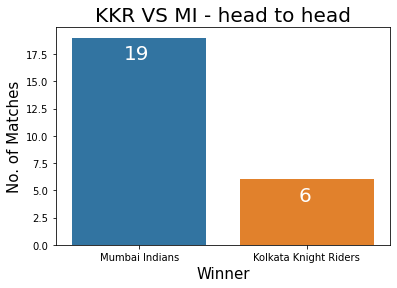

In [13]:
sns.countplot(KM["winner"])
plt.text(-0.09,17,str(KM['winner'].value_counts()['Mumbai Indians']),size=20,color='white')
plt.text(0.95,4,str(KM['winner'].value_counts()['Kolkata Knight Riders']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('KKR VS MI - head to head',fontsize = 20)

In [14]:
Season_wise_Match_Winner = pd.DataFrame(KM.groupby(["season","winner"])["winner"].count())
print("Season wise winner of matches between KKR and MI :")
Season_wise_Match_Winner

Season wise winner of matches between KKR and MI :


winner
season winner                       
2008   Mumbai Indians              2
2009   Mumbai Indians              2
2010   Kolkata Knight Riders       1
       Mumbai Indians              1
2011   Mumbai Indians              2
2012   Kolkata Knight Riders       1
       Mumbai Indians              1
2013   Mumbai Indians              2
2014   Kolkata Knight Riders       2
2015   Kolkata Knight Riders       1
       Mumbai Indians              1
2016   Mumbai Indians              2
2017   Mumbai Indians              3
2018   Mumbai Indians              2
2019   Kolkata Knight Riders       1
       Mumbai Indians              1

### Winning Percentage

In [15]:
Winning_Percentage = KM['winner'].value_counts()/len(KM['winner'])

In [16]:
print(" MI winning percentage against KKR(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("KKR winning percentage against MI(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

 MI winning percentage against KKR(overall) : 76%
KKR winning percentage against MI(overall) : 24%


### Performance Based Analysis

In [17]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [18]:
performance("Kolkata Knight Riders",KM)

Number of times given team win while defending : 3
Number of times given team win while chasing   : 3

Average runs by which a given team wins while defending  :  36.0
Average wickets by which a given team wins while chasing :  7.0


In [19]:
performance("Mumbai Indians",KM)

Number of times given team win while defending : 8
Number of times given team win while chasing   : 11

Average runs by which a given team wins while defending  :  40.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

In [20]:
Toss_Decision_based_Winner = pd.DataFrame(KM.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner           toss_decision winner                       
Kolkata Knight Riders bat           Kolkata Knight Riders       1
                                    Mumbai Indians              3
                      field         Kolkata Knight Riders       2
                                    Mumbai Indians              4
Mumbai Indians        bat           Kolkata Knight Riders       1
                                    Mumbai Indians              4
                      field         Kolkata Knight Riders       2
                                    Mumbai Indians              8

In [21]:
Toss_Decision = pd.DataFrame(KM.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner           toss_decision               
Kolkata Knight Riders bat                        4
                      field                      6
Mumbai Indians        bat                        5
                      field                     10

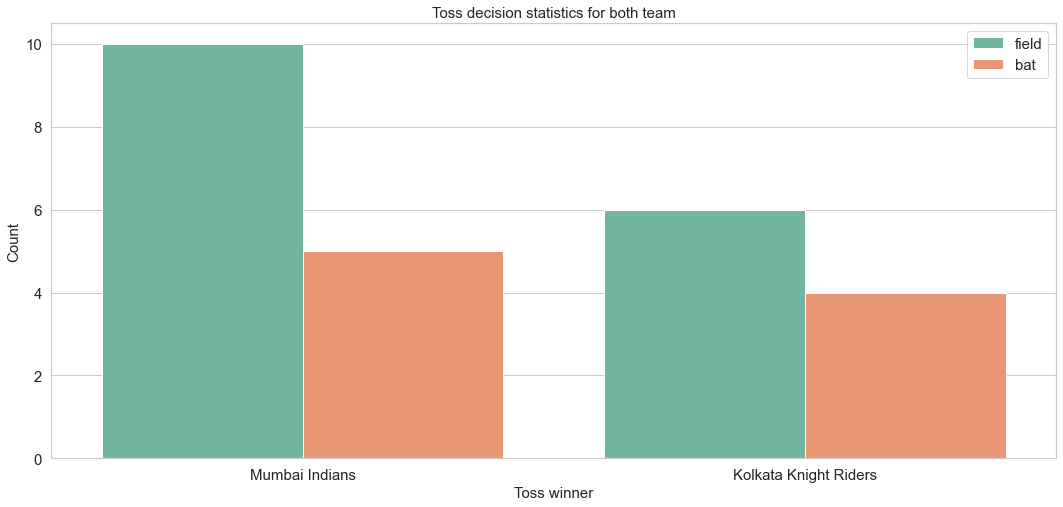

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(KM['toss_winner'],palette='Set2',hue=KM['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

From the above analysis we can see that mostly both the teams prefer chasing the score after winning the toss

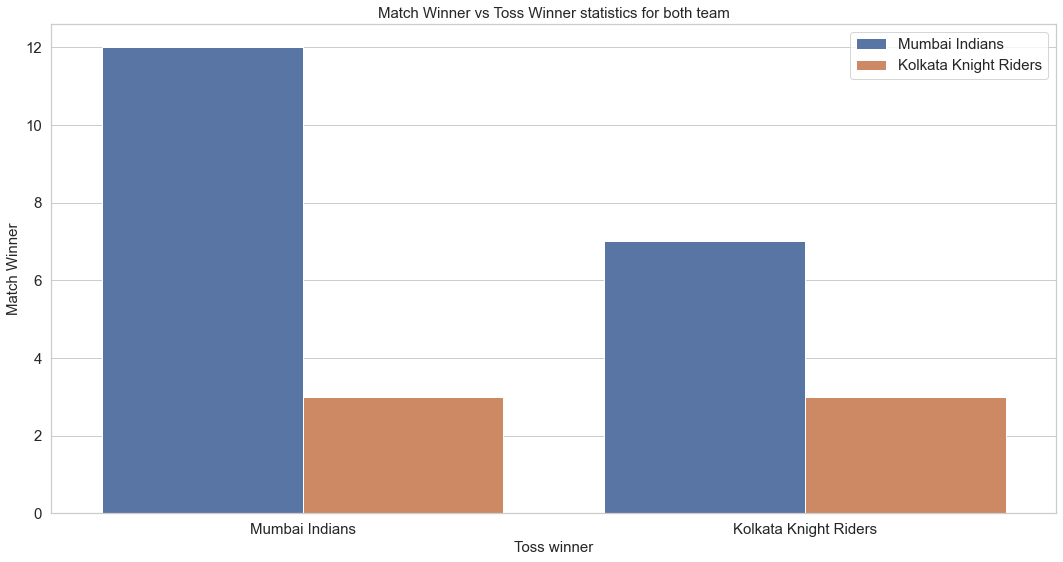

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KM['toss_winner'],hue=KM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

Toss Decision based Analysis of both the teams seperately :

In [24]:
KKR = KM[KM["toss_winner"]=="Kolkata Knight Riders"]
MI = KM[KM["toss_winner"]=="Mumbai Indians"]

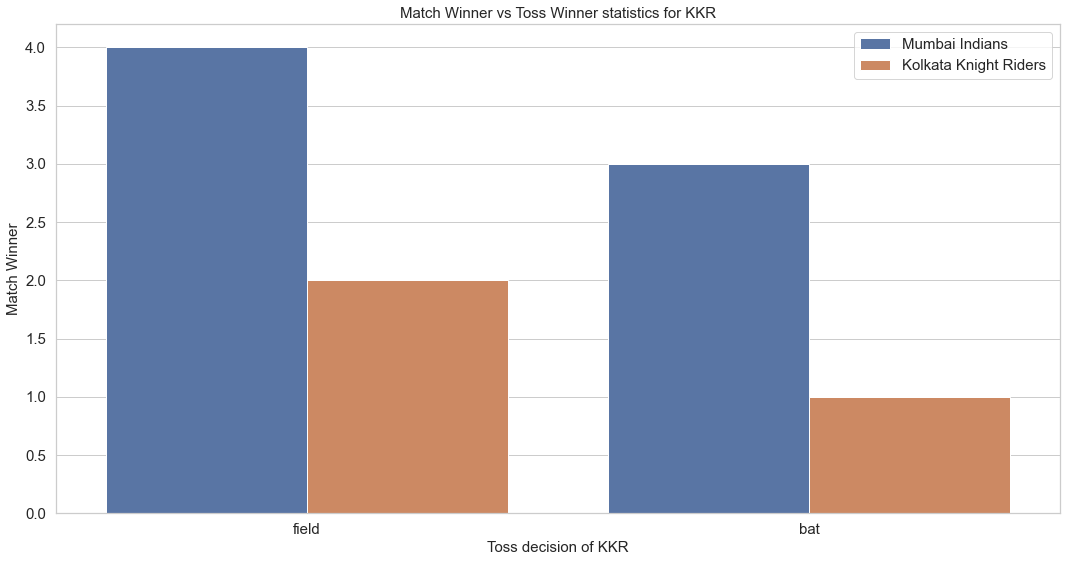

In [25]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KKR['toss_decision'],hue=KKR['winner'])
plt.title('Match Winner vs Toss Winner statistics for KKR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KKR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

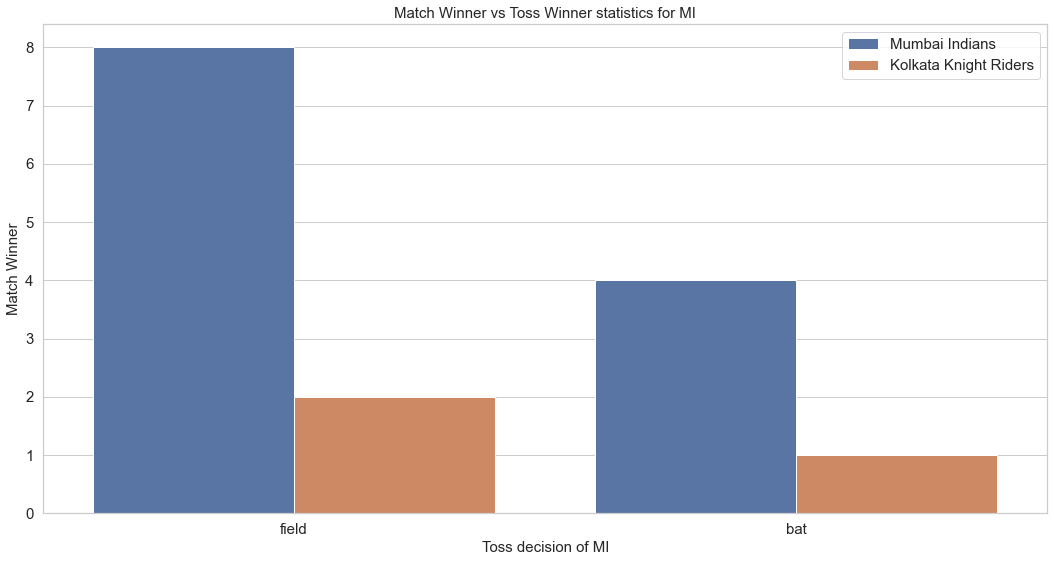

In [26]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(MI['toss_decision'],hue=MI['winner'])
plt.title('Match Winner vs Toss Winner statistics for MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of MI',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [27]:
player_of_the_match = pd.DataFrame(KM.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
RG Sharma,3
SR Tendulkar,3
HH Pandya,3
M Kartik,1
Ishan Kishan,1
KV Sharma,1
AD Russell,1
N Rana,1
JEC Franklin,1
JH Kallis,1


### Recent Year Performance Analysis

In [28]:
cond1 = KM["season"] == 2015
cond2 = KM["season"] == 2016
cond3 = KM["season"] == 2017
cond4 = KM["season"] == 2018
cond5 = KM["season"] == 2019
final = KM[cond1 | cond2 | cond3 | cond4 | cond5]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
53,2017,Kolkata,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens
58,2017,Bangalore,2017-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KV Sharma,M Chinnaswamy Stadium
518,2015,Kolkata,2015-04-08,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,M Morkel,Eden Gardens
567,2015,Mumbai,2015-05-14,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,5,0,HH Pandya,Wankhede Stadium
581,2016,Kolkata,2016-04-13,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Eden Gardens
600,2016,Mumbai,2016-04-28,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Wankhede Stadium
7930,2018,Mumbai,06/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,13,0,HH Pandya,Wankhede Stadium
7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens


In [29]:
final.shape

(11, 14)

In [30]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
HH Pandya,3
RG Sharma,2
M Morkel,1
AD Russell,1
N Rana,1
AT Rayudu,1
KV Sharma,1
Ishan Kishan,1


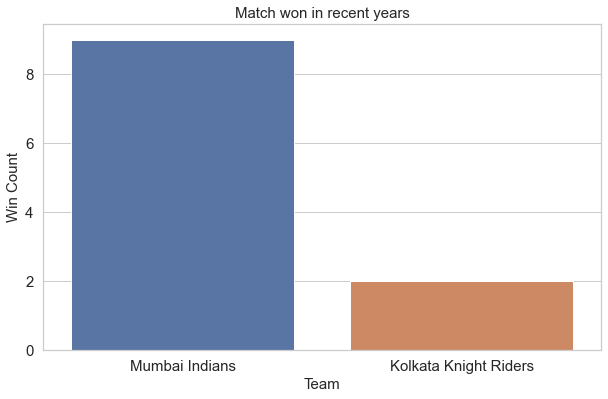

In [31]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)
#plt.legend(loc=1,fontsize=15)

plt.show()

From all the above analysis , we found a complete domination of Mumbai Indians over Kolkata Knight Riders.

So , based on the analysis related to head to head performance , toss based result etc we can predict Mumbai Indians to be favorite for today's match.